# ДЗ: Обучение с учителем и без

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (10, 7)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet', 10),
                                         alpha=0.5, figsize=figsize, colorbar=True, edgecolor='none')
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
# масштабирование данных
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
X.shape

(1797, 64)

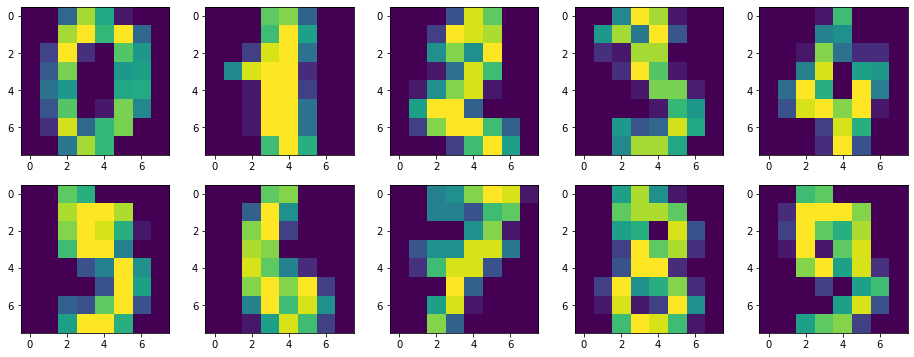

In [7]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

## Понижение размерности

In [8]:
N = 10
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]

**PCA**

In [9]:
pca = PCA(n_components=dims)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

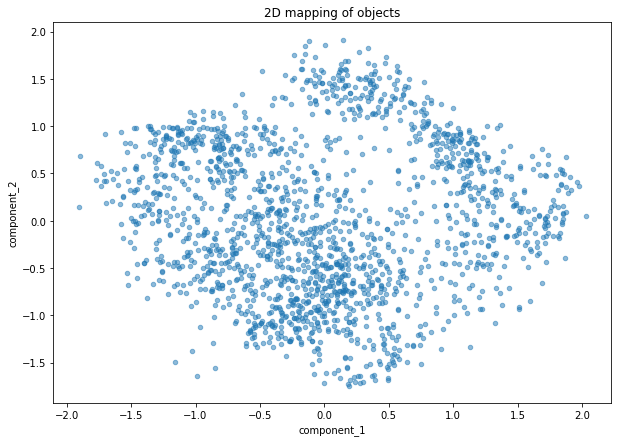

In [10]:
components_X_pca = pd.DataFrame(data=X_pca, columns=colnames)
# components_X_pca.head()

display_components_in_2D_space(components_X_pca)

**t-SNE**

In [11]:
%%time
tsne = TSNE(n_components=dims, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)

CPU times: total: 54.1 s
Wall time: 3.51 s


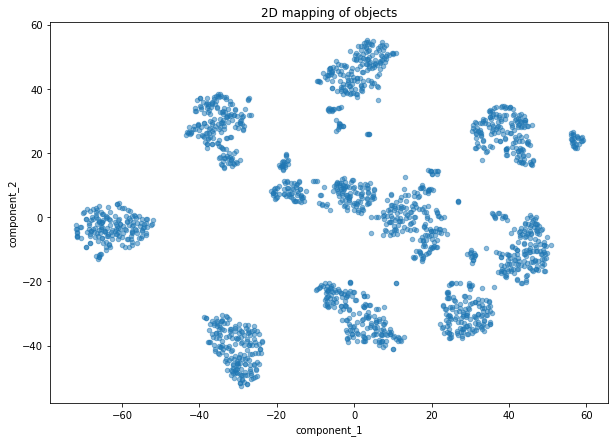

In [12]:
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
# components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)

## Кластеризация

**KMeans**

In [13]:
kmeans = KMeans(n_clusters=N, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
labels_kmeans = pd.Series(labels_kmeans, name='clusters')

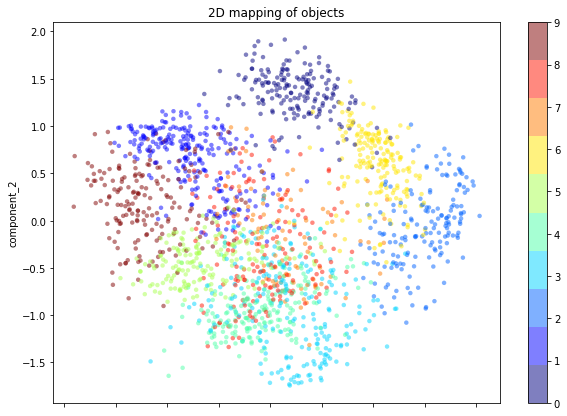

In [14]:
display_components_in_2D_space(components_X_pca, labels=labels_kmeans)

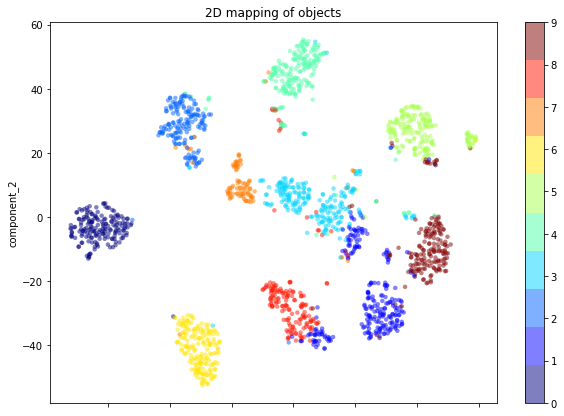

In [15]:
display_components_in_2D_space(components_X_tsne, labels=labels_kmeans)

**AgglomerativeClustering**

In [16]:
%%time
aggl = AgglomerativeClustering(n_clusters=N)
labels_aggl = aggl.fit_predict(X)
labels_aggl = pd.Series(labels_aggl)

CPU times: total: 125 ms
Wall time: 125 ms


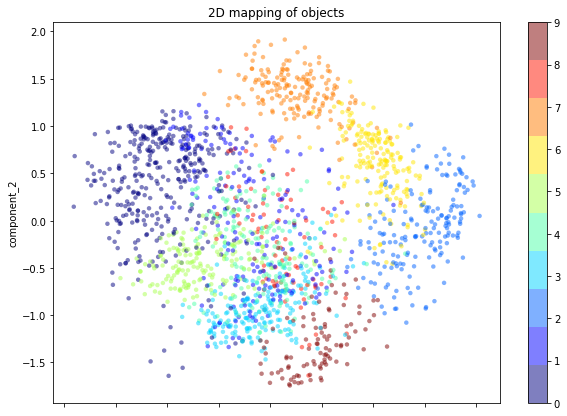

In [17]:
display_components_in_2D_space(components_X_pca, labels=labels_aggl)

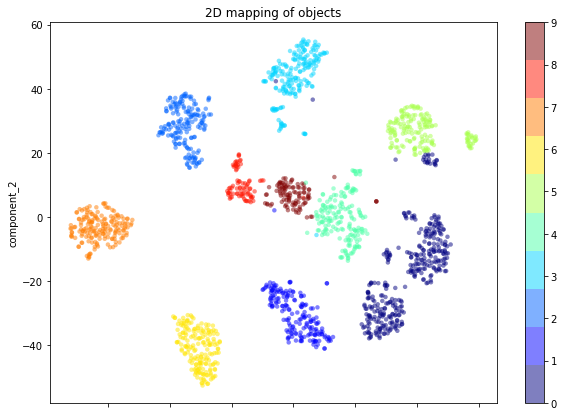

In [18]:
display_components_in_2D_space(components_X_tsne, labels=labels_aggl)

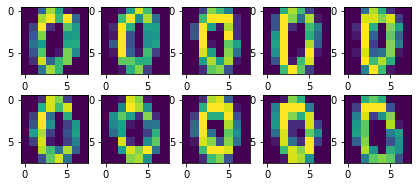

In [19]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_aggl == 7][i,:].reshape([8,8]))

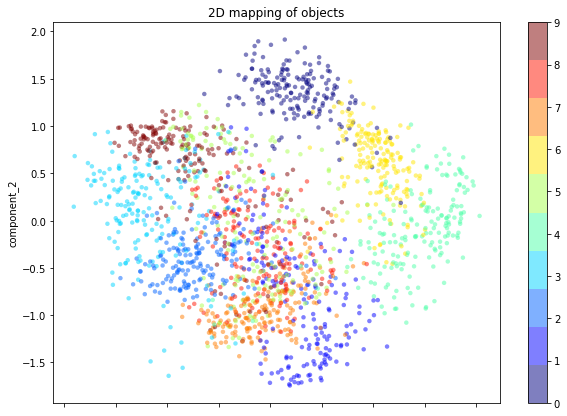

In [20]:
display_components_in_2D_space(components_X_pca, labels=y)

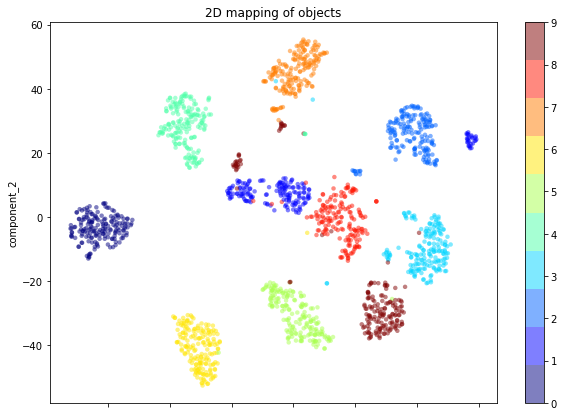

In [21]:
display_components_in_2D_space(components_X_tsne, labels=y)